<a href="https://colab.research.google.com/github/wesslen/dsba6211-summer2024/blob/main/notebooks/dsba6211_summer2024_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
%%capture
!pip install skforecast
!pip install pmdarima

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima
# skforecast
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from skforecast.datasets import fetch_dataset
# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Data

In [ ]:
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1138&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=ENPLANE&scale=left&cosd=2000-01-01&coed=2024-02-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2024-06-27&revision_date=2024-06-27&nd=2000-01-01"

df = pd.read_csv(url, index_col=0, parse_dates=True)
df.head()

,ENPLANE
DATE,
2000-01-01,46492.0
2000-02-01,48526.0
2000-03-01,58764.0
2000-04-01,56032.0
2000-05-01,58201.0


For this data, we'll use:
- training data: 2000 to 2015
- validation data: 2016 to 2017
- test data: 2018 to 2019

In [ ]:
# filter df only by 2010 to most recent
df = df['2001-01-01':'2019-12-31']

Train dates : 2001-01-01 00:00:00 --- 2016-12-01 00:00:00  (n=192)
Test dates  : 2017-01-01 00:00:00 --- 2019-12-01 00:00:00  (n=36)


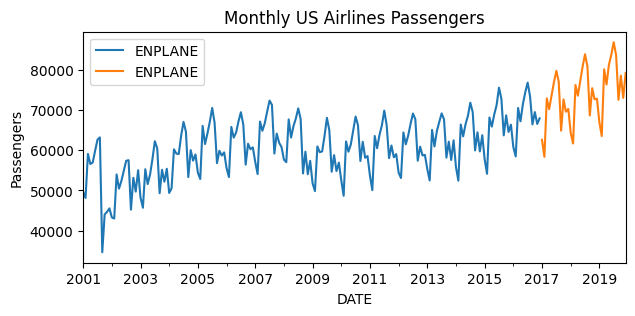

In [ ]:
end_train = '2016-12-31 23:59:59'
print(
    f"Train dates : {df.index.min()} --- {df.loc[:end_train].index.max()}  "
    f"(n={len(df.loc[:end_train])})"
)
print(
    f"Test dates  : {df.loc[end_train:].index.min()} --- {df.loc[:].index.max()}  "
    f"(n={len(df.loc[end_train:])})"
)
data_train = df.loc[:end_train]
data_test  = df.loc[end_train:]

# Plot
# ======================================================================================
fig, ax=plt.subplots(figsize=(7, 3))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.set_title('Monthly US Airlines Passengers')
ax.set_ylabel('Passengers')
ax.legend();

## Problem 1: Create Baseline

Fill in the `!<-- fill in -->!` with the correct syntax to create a naive seasonal forecast that is the value of the same month of the previous year.

Hint: to find [the docs for help](https://skforecast.org/0.12.1/user_guides/forecasting-baseline.html#forecasterequivalentdate).

In [6]:
from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import bayesian_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import select_features

# Convert index to DatetimeIndex with frequency
data_train.index = pd.to_datetime(data_train.index)
data_train = data_train.asfreq('MS')

# Create baseline: value of the same month of the previous year
# ==============================================================================
# forecaster = ForecasterEquivalentDate(
#                  offset    = pd.DateOffset(!<-- fill in -->!),
#                  n_offsets = 1
#              )

# Train forecaster
# ==============================================================================
forecaster.fit(y=data_train['ENPLANE'])
baseline_predict = forecaster.predict(steps=len(data_test))
forecaster

## Problem 2: LightGBM

1. Create `ForecasterAugreg` with `LGBMRegressor` as the regressor setting the `lags` to 12 and the `differentiation` to 1. Also within `LGBMRegressor`, set the `random_state` to 123. Keep all other default parameters.

2. Fit the model, use `.predict()` with the same number of steps of the `data_test` and name its predictions to `lgbm_predict`.

3. Print out the details of your model by including the name of your model (e.g., if your model is named `forecaster`, then just run `forecaster`

4. Then run your model with `.get_feature_importances()`. What are the top 3 most important features in your model?

For an example of a similar pipeline, see [here](https://skforecast.org/0.12.1/user_guides/forecasting-xgboost-lightgbm#forecaster-lightgbm).

Another difference from that examples is **do not** include exogenous variables.

In [5]:
from lightgbm import LGBMRegressor

# Create and fit forecaster
# ==============================================================================
# add code below

In [4]:
# forecaster.get_feature_importances()

## Problem 3: Prediction



1. Run the `matplotlib` plot below, showing your (1) test data, (2) baseline prediction, and (3) LGBM predictions.

2. From the plot - which model does a better job predicting your test data? Do you notice noticeable pattern of your models' predictions?

3. Calculate `mean_absolute_error` between `data_test` and your model predictions (so you will run `mean_absolute_error` twice). Which model has the lower Mean Absolute Error?

In [1]:
# fig, ax = plt.subplots(figsize=(10, 5))
# plt.plot(data_test, label='test')
# plt.plot(lgbm_predict, label='LGBM')
# plt.plot(baseline_predict, label='Baseline')
# ax.set_title('Predictions')
# ax.legend();

In [2]:
# sklearn mean_absolute_error
# add code below

In [3]:
# sklearn mean_absolute_error
# add code below

## Problem 4: Hyperparameter Tuning

We'll now try to tune your Boosting model.

Instead of using grid or random search, we'll use [Bayesian search](https://skforecast.org/0.12.1/user_guides/hyperparameter-tuning-and-lags-selection.html#bayesian-search).

Run the code below. For the best model, provide:
1. how many estimators (trees) were used?
2. what's the maximum depth of the trees?
3. learning rate?

4. How do these compare to the default model previously run?

Plot the tuned model's prediction and mean absolute error.

5. How does your tuned model compared to your previous Boosting model and baseline?

In [7]:
from skforecast.model_selection import bayesian_search_forecaster

# Hyperparameters search
# ==============================================================================
# Lags grid
lags_grid = [6, 12]

# Regressor hyperparameters search space
def search_space(trial):
    search_space  = {
        'n_estimators'    : trial.suggest_int('n_estimators', 100, 600, step=100),
        'max_depth'       : trial.suggest_int('max_depth', -1, 5, step=1),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 25, 500),
        'learning_rate'   : trial.suggest_float('learning_rate', 0.01, 0.5),
        'reg_alpha'       : trial.suggest_float('reg_alpha', 0, 1, step=0.1),
        'reg_lambda'      : trial.suggest_float('reg_lambda', 0, 1, step=0.1),
        'lags'            : trial.suggest_categorical('lags', lags_grid)
    }
    return search_space

results_search, frozen_trial = bayesian_search_forecaster(
    forecaster         = forecaster,
    y                  = data_train['ENPLANE'], # Test data not used
    search_space       = search_space,
    steps              = len(data_test),
    refit              = False,
    metric             = 'mean_absolute_error',
    initial_train_size = len(data_test),
    fixed_train_size   = False,
    n_trials           = 20, # Increase this value for a more exhaustive search
    random_state       = 123,
    return_best        = True,
    n_jobs             = 'auto',
    verbose            = False,
    show_progress      = True
)

In [8]:
# tuned_predictor = forecaster.predict(steps=len(data_test))

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.plot(data_test, label='test')
plt.plot(lgbm_predict, label='LGBM')
plt.plot(baseline_predict, label='Baseline')
plt.plot(tuned_predictor, label='Tuned LGBM')
ax.set_title('Predictions')
ax.legend();

In [10]:
# sklearn mean_absolute_error
# add code below